In [12]:
import os
import csv
import json
import random
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict

In [2]:
data_root = '/Data/Promotion/'
mag_dir = '/Data/MAG_2019/'

def fpath(filename):
    return os.path.join(data_root, filename)

def yield_one_line(filename, delimiter=',', quoting = csv.QUOTE_ALL):
    '''a generator which produce one line of a given file'''
    with open(filename, 'r') as file:
        reader = csv.reader(file, delimiter=delimiter, quoting=quoting)
        count = 0
        for row in reader:
            count += 1
            if count % 10000000 == 0:
                print('processed %d lines...' % (count))
            yield row

In [3]:
with open(data_root+'revision/alt_dois.pickle', 'rb') as ofile:
    dois = pickle.load(ofile)
dois = set(dois)

In [4]:
len(dois)

6601528

In [18]:
pid_to_doi = {}
doi_to_pid = {}

In [19]:
for line in yield_one_line(mag_dir+'Papers.csv', delimiter=',', quoting=csv.QUOTE_ALL):
    pid, doi = line[0], line[2]
    # lowercase all DOIs
    doi = doi.lower()
    if doi in dois:
        pid_to_doi[pid] = doi
        doi_to_pid[doi] = pid

processed 10000000 lines...
processed 20000000 lines...
processed 30000000 lines...
processed 40000000 lines...
processed 50000000 lines...
processed 60000000 lines...
processed 70000000 lines...
processed 80000000 lines...
processed 90000000 lines...
processed 100000000 lines...
processed 110000000 lines...
processed 120000000 lines...
processed 130000000 lines...
processed 140000000 lines...
processed 150000000 lines...
processed 160000000 lines...
processed 170000000 lines...
processed 180000000 lines...
processed 190000000 lines...
processed 200000000 lines...
processed 210000000 lines...
processed 220000000 lines...


MAG `pid` and `doi` is not uniquely matched

In [20]:
len(pid_to_doi)

6284420

In [21]:
len(doi_to_pid)

6152934

In [22]:
sorted(Counter(pid_to_doi.values()).items(), key=lambda x: x[1], reverse=True)[:10]

[('10.13039/501100003329', 1238),
 ('10.3968/%x', 991),
 ('10.13039/501100000780', 939),
 ('10.3968/n', 931),
 ('10.21615/ces', 671),
 ('10.13039/501100004837', 642),
 ('10.22264/clio', 551),
 ('10.1590/%x', 464),
 ('10.13039/501100003339', 309),
 ('10.1241/johokanri.58.389', 292)]

In [23]:
dois_valid = set()

for doi, cn in Counter(pid_to_doi.values()).items():
    if cn == 1:
        dois_valid.add(doi)

In [24]:
len(dois_valid)

6076674

In [25]:
for pid in list(pid_to_doi.keys()):
    doi = pid_to_doi[pid]
    if doi not in dois_valid:
        del pid_to_doi[pid]
        
for doi in list(doi_to_pid.keys()):
    if doi not in dois_valid:
        del doi_to_pid[doi]

In [26]:
len(pid_to_doi)

6076674

In [27]:
len(doi_to_pid)

6076674

In [28]:
len(pid_to_doi) / len(dois)

0.9204950732618267

In [29]:
del dois_valid

(SI) - papers in MAG vs. in Altmetric

In [4]:
years = set(['2013', '2014', '2015', '2016', '2017', '2018'])

In [5]:
years

{'2013', '2014', '2015', '2016', '2017', '2018'}

In [6]:
year_cn = defaultdict(int)

for line in yield_one_line(mag_dir+'Papers.csv', delimiter=',', quoting=csv.QUOTE_ALL):
    pid, doi, doctype, year = line[0], line[2], line[3], line[7]
    # lowercase all DOIs
    doi = doi.lower()
    if doi != "" and year in years:
        # research papers
        if doctype == "Journal" or doctype == "Conference":
            year_cn[year] += 1

processed 10000000 lines...
processed 20000000 lines...
processed 30000000 lines...
processed 40000000 lines...
processed 50000000 lines...
processed 60000000 lines...
processed 70000000 lines...
processed 80000000 lines...
processed 90000000 lines...
processed 100000000 lines...
processed 110000000 lines...
processed 120000000 lines...
processed 130000000 lines...
processed 140000000 lines...
processed 150000000 lines...
processed 160000000 lines...
processed 170000000 lines...
processed 180000000 lines...
processed 190000000 lines...
processed 200000000 lines...
processed 210000000 lines...
processed 220000000 lines...


In [7]:
# research papers in MAG
year_cn

defaultdict(int,
            {'2014': 2742706,
             '2016': 2955871,
             '2013': 2610680,
             '2015': 2790025,
             '2018': 2979206,
             '2017': 3088340})

In [8]:
sum(year_cn.values())

17166828

In [10]:
# papers in Altmetric
alt_dic = {'2013': 875371,
'2016': 1187604,
'2014': 981578,
'2017': 1232949,
'2015': 1105317,
'2018': 1218709}

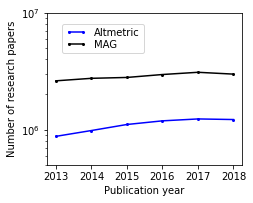

In [28]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.5, 2.8))

xs = sorted(years)
ys1 = [alt_dic[y] for y in xs]
ys2 = [year_cn[y] for y in xs]

ax.plot(xs, ys1, color='blue', marker = 'o', alpha=1, markersize=2, linewidth=1.5, label='Altmetric')
ax.plot(xs, ys2, color='black', marker = 'o', alpha=1, markersize=2, linewidth=1.5, label='MAG')

legend = ax.legend(bbox_to_anchor=(0.05, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
ax.set_xlabel('Publication year')
ax.set_ylabel('Number of research papers')
ax.set_yscale('log')
ax.set_ylim([0.5e6, 1e7])

# plt.tight_layout()
plt.show()
fig.savefig('./mag_vs_alt.pdf', bbox_inches='tight', pad_inches=0.02)

Authors

In [28]:
dois_authors_mag = defaultdict(list)

In [29]:
for line in yield_one_line(mag_dir+'PaperAuthorAffiliations.txt', delimiter='\t', quoting=csv.QUOTE_NONE):
    pid, aid, aff_id, seq, name = line[:5]
    if pid in pid_to_doi:
        doi = pid_to_doi[pid]
        dois_authors_mag[doi].append((aid, aff_id, seq, name))

processed 10000000 lines...
processed 20000000 lines...
processed 30000000 lines...
processed 40000000 lines...
processed 50000000 lines...
processed 60000000 lines...
processed 70000000 lines...
processed 80000000 lines...
processed 90000000 lines...
processed 100000000 lines...
processed 110000000 lines...
processed 120000000 lines...
processed 130000000 lines...
processed 140000000 lines...
processed 150000000 lines...
processed 160000000 lines...
processed 170000000 lines...
processed 180000000 lines...
processed 190000000 lines...
processed 200000000 lines...
processed 210000000 lines...
processed 220000000 lines...
processed 230000000 lines...
processed 240000000 lines...
processed 250000000 lines...
processed 260000000 lines...
processed 270000000 lines...
processed 280000000 lines...
processed 290000000 lines...
processed 300000000 lines...
processed 310000000 lines...
processed 320000000 lines...
processed 330000000 lines...
processed 340000000 lines...
processed 350000000 lin

In [30]:
len(dois_authors_mag)

6076669

In [32]:
with open(fpath('revision/dois_authors_mag.json'), 'w') as ofile:
    for doi in dois_authors_mag:
        pid = doi_to_pid[doi]
        authors = dois_authors_mag[doi]
        row = {'doi': doi, 'mag_pid': pid, 'authors': authors}
        ofile.write(json.dumps(row) + '\n')

In [6]:
dois_authors_mag = {}

with open(fpath('revision/dois_authors_mag.json'), 'r') as ofile:
    for row in ofile:
        row = json.loads(row)
        doi, authors = row['doi'], row['authors']
        dois_authors_mag[doi] = authors

In [33]:
all_aids = set()
for doi in dois_authors_mag:
    authors = dois_authors_mag[doi]
    for aid, aff_id, seq, name in authors:
#         seq = int(seq)
#         if seq == 1:
        all_aids.add(aid)

In [34]:
len(all_aids)

9777945

In [35]:
aids_metric = dict()

for line in yield_one_line(mag_dir+'Authors.txt', delimiter='\t', quoting=csv.QUOTE_NONE):
    aid, rank, num_paper, num_cite = line[0], line[1], line[5], line[6]
    if aid in all_aids:
        aids_metric[aid] = (rank, num_paper, num_cite)

processed 10000000 lines...
processed 20000000 lines...
processed 30000000 lines...
processed 40000000 lines...
processed 50000000 lines...
processed 60000000 lines...
processed 70000000 lines...
processed 80000000 lines...
processed 90000000 lines...
processed 100000000 lines...
processed 110000000 lines...
processed 120000000 lines...
processed 130000000 lines...
processed 140000000 lines...
processed 150000000 lines...
processed 160000000 lines...
processed 170000000 lines...
processed 180000000 lines...
processed 190000000 lines...
processed 200000000 lines...
processed 210000000 lines...
processed 220000000 lines...
processed 230000000 lines...
processed 240000000 lines...


In [36]:
len(aids_metric)

9777945

In [37]:
with open(fpath('revision/aids_metric_mag.json'), 'w') as ofile:
    for aid, info in aids_metric.items():
        row = {'aid': aid, 'metric': info}
        ofile.write(json.dumps(row) + '\n')

Author paper counts

In [38]:
pid_year = {}

for line in yield_one_line(mag_dir+'Papers.csv', delimiter=',', quoting=csv.QUOTE_ALL):
    pid, year = line[0], line[7]
    # lowercase all DOIs
    # doi = doi.lower()
    if year != '' and int(year) <= 2018:
        pid_year[pid] = year

processed 10000000 lines...
processed 20000000 lines...
processed 30000000 lines...
processed 40000000 lines...
processed 50000000 lines...
processed 60000000 lines...
processed 70000000 lines...
processed 90000000 lines...
processed 100000000 lines...
processed 110000000 lines...
processed 120000000 lines...
processed 130000000 lines...
processed 140000000 lines...
processed 150000000 lines...
processed 160000000 lines...
processed 170000000 lines...
processed 180000000 lines...
processed 190000000 lines...
processed 200000000 lines...
processed 210000000 lines...
processed 220000000 lines...


In [39]:
len(pid_year)

219618489

In [40]:
aid_year_paper_list = defaultdict(lambda: defaultdict(list))

for line in yield_one_line(mag_dir+'PaperAuthorAffiliations.txt', delimiter='\t', quoting=csv.QUOTE_NONE):
    pid, aid = line[:2]
    if pid in pid_year:
        year = pid_year[pid]
        if aid in all_aids:
            if int(year) <= 2018:
                aid_year_paper_list[aid][year].append(pid)

processed 10000000 lines...
processed 20000000 lines...
processed 30000000 lines...
processed 40000000 lines...
processed 50000000 lines...
processed 60000000 lines...
processed 70000000 lines...
processed 80000000 lines...
processed 90000000 lines...
processed 100000000 lines...
processed 110000000 lines...
processed 120000000 lines...
processed 130000000 lines...
processed 140000000 lines...
processed 150000000 lines...
processed 160000000 lines...
processed 170000000 lines...
processed 180000000 lines...
processed 190000000 lines...
processed 200000000 lines...
processed 210000000 lines...
processed 220000000 lines...
processed 230000000 lines...
processed 240000000 lines...
processed 250000000 lines...
processed 260000000 lines...
processed 270000000 lines...
processed 280000000 lines...
processed 290000000 lines...
processed 300000000 lines...
processed 310000000 lines...
processed 320000000 lines...
processed 330000000 lines...
processed 340000000 lines...
processed 350000000 lin

In [41]:
len(aid_year_paper_list)

9776277

In [42]:
# this counts pubs in all years.
with open(fpath('revision/aid_year_paper_list.json'), 'w') as ofile:
    for aid, info in aid_year_paper_list.items():
        row = {'aid': aid, 'year_pids': info}
        ofile.write(json.dumps(row) + '\n')

In [43]:
pids_track = set()
for aid in aid_year_paper_list:
    for year, pids in aid_year_paper_list[aid].items():
        for pid in pids:
            pids_track.add(pid)

In [44]:
len(pids_track)

55144374

In [45]:
pid_yearly_cites = defaultdict(lambda: defaultdict(int))

for line in yield_one_line(mag_dir+'PaperReferences.txt', delimiter='\t', quoting=csv.QUOTE_NONE):
    pid, rid = line[0], line[1]
    if pid in pid_year:
        year = pid_year[pid]
        # citing paper has to be published before 2018.
        if int(year) <= 2017 and rid in pids_track:
            pid_yearly_cites[rid][year] += 1

processed 10000000 lines...
processed 20000000 lines...
processed 30000000 lines...
processed 40000000 lines...
processed 50000000 lines...
processed 60000000 lines...
processed 70000000 lines...
processed 80000000 lines...
processed 90000000 lines...
processed 100000000 lines...
processed 110000000 lines...
processed 120000000 lines...
processed 130000000 lines...
processed 140000000 lines...
processed 150000000 lines...
processed 160000000 lines...
processed 170000000 lines...
processed 180000000 lines...
processed 190000000 lines...
processed 200000000 lines...
processed 210000000 lines...
processed 220000000 lines...
processed 230000000 lines...
processed 240000000 lines...
processed 250000000 lines...
processed 260000000 lines...
processed 270000000 lines...
processed 280000000 lines...
processed 290000000 lines...
processed 300000000 lines...
processed 310000000 lines...
processed 320000000 lines...
processed 330000000 lines...
processed 340000000 lines...
processed 350000000 lin

In [46]:
# some papers may have 0 citations, so they won't be in this dictionary
len(pid_yearly_cites)

32579748

In [47]:
with open(fpath('revision/pid_yearly_cites.json'), 'w') as ofile:
    for pid, info in pid_yearly_cites.items():
        row = {'pid': pid, 'y_cites': info}
        ofile.write(json.dumps(row) + '\n')

In [50]:
aid_cites_upto_years = defaultdict(lambda: defaultdict(int))

for aid in all_aids:
    if aid in aid_year_paper_list:
        for year, pids in aid_year_paper_list[aid].items():
            year = int(year)
            for pid in pids:
                for i in range(year, 2017+1):
                    cn = pid_yearly_cites[pid][str(i)]
                    # only record citations up to these years:
                    for record_year in [2012, 2013, 2014, 2015, 2016, 2017]:
                        if i <= record_year:
                            aid_cites_upto_years[aid][record_year] += cn

In [51]:
len(aid_cites_upto_years)

8744877

In [53]:
aid_cites_upto_years['1100005138']

defaultdict(int, {2012: 36, 2013: 38, 2014: 45, 2015: 51, 2016: 59, 2017: 67})

In [52]:
with open(fpath('revision/aid_cites_upto_years.json'), 'w') as ofile:
    for aid, info in aid_cites_upto_years.items():
        row = {'aid': aid, 'cum_cites': info}
        ofile.write(json.dumps(row) + '\n')